<a href="https://colab.research.google.com/github/djdunc/casa0018/blob/main/Week5/CASA0018_5_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning 
To demonstrate the process of transfer learning we will explore an example based on VGG16. 

The VGG16 model was developed by the Visual Graphics Group (VGG) at Oxford and was described in the 2014 paper titled [“Very Deep Convolutional Networks for Large-Scale Image Recognition.”](https://arxiv.org/abs/1409.1556)

By default, the model expects color input images to be rescaled to the size of 224×224 pixels.

The pre-trained model can be loaded as follows. Running the code block will load the VGG16 model and download the model weights. Notice the last few Dense layers and the total number of trainable parameters.

In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

You could try the same for other models such as InceptionV3 or ResNet50. You just need to edit the lines below to explore those models. Take a look at the API documentation to see how the models are referenced - note that InceptionV3 may not be labelled quite how you first imagine and watch out for case sensitivity. 

https://keras.io/api/applications/resnet/

https://keras.io/api/applications/inceptionv3/

In [ ]:
# example of loading the resnet50 model
from keras.applications.####ADD_IN_APPLICATION_NAME### import ResNet50
# load model
model = ###ADD_IN_MODEL_NAME###()
# summarize the model
model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
# example of loading the InceptionV3 model
from keras.applications.####ADD_IN_APPLICATION_NAME### import InceptionV3
# load model
model = ###ADD_IN_MODEL_NAME###()
# summarize the model
model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

# Examples of how to use the pre-trained models 

## As a simple classifer.
There is no transfer learning here but as a reminder, we can use this pre-trained model to classify an image.

In [92]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# load an image from file
image = load_img('D_Arlo.jpeg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = tf.keras.applications.VGG16()
# predict the probability across all output classes
p = model.predict(image)
# convert the probabilities to class labels
lst = decode_predictions(p, top=3)
print(lst)

for label in lst[0]:
  # print(label)
  print('I think this is a %s and I am %.2f%% confident.' % (label[1], label[2]*100))

[[('n02101556', 'clumber', 0.9254366), ('n02102318', 'cocker_spaniel', 0.04244575), ('n02100735', 'English_setter', 0.023048783)]]
I think this is a clumber and I am 92.54% confident.
I think this is a cocker_spaniel and I am 4.24% confident.
I think this is a English_setter and I am 2.30% confident.


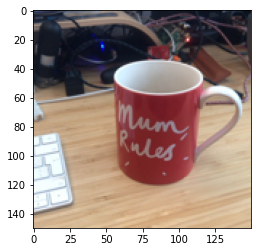

In [ ]:
from PIL import Image
from urllib import request
from io import BytesIO

url = "https://raw.githubusercontent.com/djdunc/casa0018/main/Week5/data/validation/mugs/mugs.1pnkdpht.ingestion-6cd7bdcf6c-vcclp.jpg"
res = request.urlopen(url).read()
Sample_Image = Image.open(BytesIO(res)).resize((150,150))

plt.imshow(Sample_Image)





In [ ]:
!wget --no-check-certificate \
    https://github.com/djdunc/casa0018/blob/main/Week5/data/validation.zip?raw=true \
    -O /content/validation.zip
  
!wget --no-check-certificate \
    https://github.com/djdunc/casa0018/blob/main/Week5/data/training.zip?raw=true \
    -O /content/training.zip

--2020-12-21 15:58:29--  https://github.com/djdunc/casa0018/blob/main/Week5/data/testing.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/djdunc/casa0018/raw/main/Week5/data/testing.zip [following]
--2020-12-21 15:58:29--  https://github.com/djdunc/casa0018/raw/main/Week5/data/testing.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/djdunc/casa0018/main/Week5/data/testing.zip [following]
--2020-12-21 15:58:29--  https://raw.githubusercontent.com/djdunc/casa0018/main/Week5/data/testing.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
import os
import zipfile

local_zip = '/content/training.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

local_zip = '/content/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
mugs_dir = os.path.join('/content/training/mugs')
plant_dir = os.path.join('/content/training/plant')
unknown_dir = os.path.join('/content/training/unknown')

print('total training mugs images:', len(os.listdir(mugs_dir)))
print('total training plants images:', len(os.listdir(plant_dir)))
print('total training unknown images:', len(os.listdir(unknown_dir)))

mugs_files = os.listdir(mugs_dir)
print(mugs_files[:10])

plant_files = os.listdir(plant_dir)
print(plant_files[:10])

unknown_files = os.listdir(unknown_dir)
print(unknown_files[:10])

total training mugs images: 37
total training plants images: 23
total training unknown images: 50
['mugs.1pnkgks8.ingestion-6cd7bdcf6c-vcclp.jpg', 'mugs.1pnkfpjf.ingestion-6cd7bdcf6c-bw4kh.jpg', 'mugs.1pnki0bs.ingestion-6cd7bdcf6c-vcclp.jpg', 'mugs.1pnkhptb.ingestion-6cd7bdcf6c-mfj7c.jpg', 'mugs.1pnkfc27.ingestion-6cd7bdcf6c-vcclp.jpg', 'mugs.1pnke7ak.ingestion-6cd7bdcf6c-vcclp.jpg', 'mugs.1pnke8pv.ingestion-6cd7bdcf6c-bw4kh.jpg', 'mugs.1pnkdv7f.ingestion-6cd7bdcf6c-bw4kh.jpg', 'mugs.1pnkfos7.ingestion-6cd7bdcf6c-vcclp.jpg', 'mugs.1pnkf441.ingestion-6cd7bdcf6c-mfj7c.jpg']
['plant.1pnk91sb.ingestion-6cd7bdcf6c-vcclp.jpg', 'plant.1pnkbnbm.ingestion-6cd7bdcf6c-vcclp.jpg', 'plant.1pnka1l3.ingestion-6cd7bdcf6c-mfj7c.jpg', 'plant.1pnkb81v.ingestion-6cd7bdcf6c-mfj7c.jpg', 'plant.1pnka8oa.ingestion-6cd7bdcf6c-bw4kh.jpg', 'plant.1pnk9cld.ingestion-6cd7bdcf6c-bw4kh.jpg', 'plant.1pnkadh9.ingestion-6cd7bdcf6c-vcclp.jpg', 'plant.1pnk9flu.ingestion-6cd7bdcf6c-mfj7c.jpg', 'plant.1pnkc02r.ingestion-6c

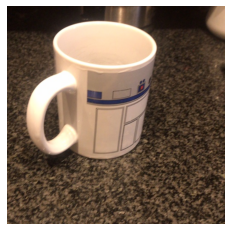

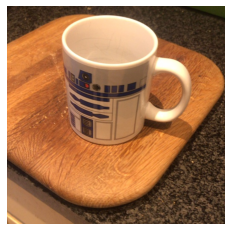

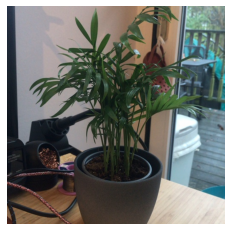

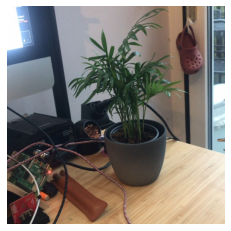

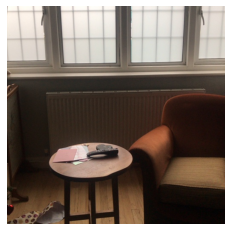

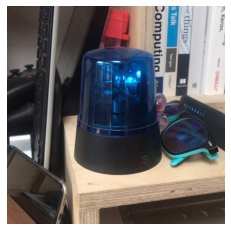

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_mugs = [os.path.join(mugs_dir, fname) 
                for fname in mugs_files[pic_index-2:pic_index]]
next_plant = [os.path.join(plant_dir, fname) 
                for fname in plant_files[pic_index-2:pic_index]]
next_unknown = [os.path.join(unknown_dir, fname) 
                for fname in unknown_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_mugs+next_plant+next_unknown):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/training/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



VALIDATION_DIR = "/content/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

label_map = (train_generator.class_indices)
print("Classes found in data are: ", label_map)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 110 images belonging to 3 classes.
Classes found in data are:  {'mugs': 0, 'plant': 1, 'unknown': 2}
Found 30 images belonging to 3 classes.


Next up we use a pretrained model as a starting point to build our new model. 

In [ ]:
# defining a variable to hold image since since it is called in few places below
IMAGE_SIZE = [150, 150]

# load model without classifier layers

#pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
#pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
#pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 24579     
Total params: 14,739,267
Trainable params: 24,579
Non-trainable params: 14,714,688
_________________________________________________________________


Finaly we can run our training:

In [ ]:
# Run training and save to history so that we can plot metrics
history = model.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

# we can save the model so that we can reload at a later date
# It appears in the content folder - download it before your session ends
# https://www.tensorflow.org/guide/keras/save_and_serialize
model.save("mugsplant.h5")

Epoch 1/10
1/1 [==============================] - 34s 34s/step - loss: 1.2970 - accuracy: 0.2545 - val_loss: 1.1099 - val_accuracy: 0.4667
Epoch 2/10
1/1 [==============================] - 32s 32s/step - loss: 1.0662 - accuracy: 0.4636 - val_loss: 0.8748 - val_accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 32s 32s/step - loss: 0.8456 - accuracy: 0.6091 - val_loss: 0.5825 - val_accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 32s 32s/step - loss: 0.6990 - accuracy: 0.7636 - val_loss: 0.4234 - val_accuracy: 0.9667
Epoch 5/10
1/1 [==============================] - 32s 32s/step - loss: 0.6061 - accuracy: 0.8000 - val_loss: 0.3406 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 33s 33s/step - loss: 0.5953 - accuracy: 0.8091 - val_loss: 0.2658 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 32s 32s/step - loss: 0.4631 - accuracy: 0.8909 - val_loss: 0.2013 - val_accuracy: 1.0000
Epoch 8/10
1/1 [===========

Once training is complete we can plot results - this should be starting to look familiar. 

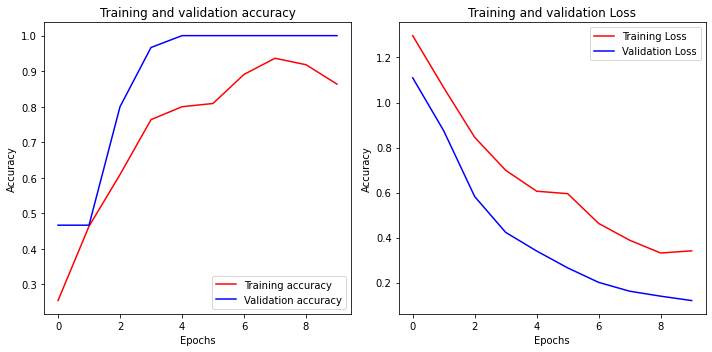

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.subplot(1, 2, 2)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.tight_layout()


# Testing your model
To see how well this model has learnt you can upload an image and classify it. Some sample images have been included in the github repo. You cna upload multiple files at once. 

(Note: I found that Safari sometimes threw errors when trying to upload files for testing. Chrome seemed to work more reliably.)

Saving test3.jpg to test3 (3).jpg
Saving testing.1pvpbk65.ingestion-6cd7bdcf6c-mfj7c.jpg to testing.1pvpbk65.ingestion-6cd7bdcf6c-mfj7c (2).jpg


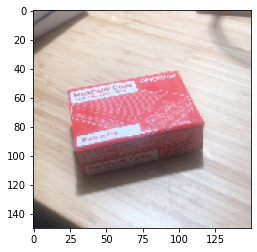

I think the image above is a "unknown" and I am 100.00% confident.
[7.4230373e-09 0.0000000e+00 1.0000000e+00]


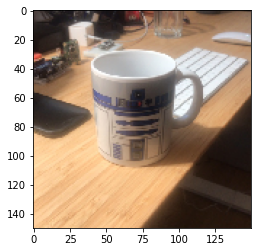

I think the image above is a "mugs" and I am 100.00% confident.
[1. 0. 0.]


In [89]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

# creates a file dialog to upload files
uploaded = files.upload()
print('---------')

# loop through all uploaded files
for fn in uploaded.keys():
 
  # load in the image and check what it looks like
  img = image.load_img(fn, target_size=(150, 150))  
  plt.imshow(img)
  plt.show()

  # convert to an array that we can use as input to our model
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  # run prediction
  p = model.predict(images)
  
  # create a look up of the class labels generated from the 
  # "flow_from_directory" method used in the generator and print result
  predicted_class_indices = np.argmax(model.predict(x), axis=-1)
  labels = (train_generator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  predictions = [labels[k] for k in predicted_class_indices]

  print('I think the image above is "%s" and I am %.2f%% confident.' % (predictions[0], p[0][predicted_class_indices]*100))

  print(p[0])
